# Using Pelita with Numpy and Matplotlib

In [1]:
import pelita
from matplotlib import pyplot as plt
import numpy as np

## Setup a toy game state
We start by accessing layout from the pelita layouts and setting up a test game to get a bot object which will have all the information about the game.

In [2]:
bot = pelita.utils.setup_test_game(layout="normal_003", is_blue=True)

## Some useful utility functions
Where we're going, we're going to frequently need to know how large our maze is. 

In [3]:
def get_maze_dimensions(walls):
    """Takes a walls list and gives the width and height of the maze"""
    maze_width = max([x for x, y in walls])+1
    maze_height = max([y for x, y in walls])+1
    return(maze_width, maze_height)

## Visualize with Matplotlib
We can use pyplot to visualize the game state. You can use `plt.scatter()` to add points to a plot. Watch out though, scatter takes a list of x and a list of y coordinates, not a list of (x,y) tuples.

Let's start by defining two functions that will help us draw the main game elements of Pelita using matplotlib.

In [4]:
def draw_coords(coords, ax, params={}):
    """
    Takes a list of coordinates and draws them as scatter elements onto a pyplot ax object

    Input:
    - coords: list of tuples of x,y coordinates
    - ax: a pyplot ax object
    - params: parameters to be passed to the scatter function (e.g. shape, size, color, etc.)
    Returns:
    - ax: a pyplot ax object
    """
    if type(coords)!=list:
        coords_x, coords_y = coords
    else:
        # get seperate lists of x and y coordinates from a list of tuples
        coords_x, coords_y = zip(*coords)
    ax.scatter(coords_x, coords_y, **params)
    return ax

The `draw_game` takes the information about food, bot positions, and wall positions from the bot object and adds them to a pyplot, with nice shapes and colors to distinguish them.

In [5]:
def draw_game(bot, ax):
    """
    Draws game state as scatter elements given a bot object.

    Input:
    - bot : pelita bot object
    - ax : a pyplot axis object
    Returns:
    -ax : a pyplot axis object
    """
    # Depending which team we are, we need to color the board appropriately
    if bot.is_blue:
        col_home_food = "blue"
        col_home_b1 = "green"
        col_home_b2 = "darkgreen"
        col_enemy_food = "red"
        col_enemy_b1 = "orange"
        col_enemy_b2 = "darkred"
    else:
        col_home_food = "red"
        col_home_b1 = "orange"
        col_home_b2 = "darkred"
        col_enemy_food = "blue"
        col_enemy_b1 = "green"
        col_enemy_b2 = "darkgreen"

    # Then we call the draw_coords function for each type of element we want to draw.
    # Each can be customized with whichever color, shape and size you want.
    ax = draw_coords(bot.position, ax, {"c": col_home_b1, "marker": "*", "s": 400})
    ax = draw_coords(bot.walls, ax, {"c": "black", "marker": "s", "s": 250})
    ax = draw_coords(bot.other.position, ax, {"c": col_home_b2, "marker": "*", "s": 400})
    ax = draw_coords(bot.food, ax, {"c": col_home_food, "s": 100})
    ax = draw_coords(bot.enemy[0].food, ax, {"c": col_enemy_food, "s": 100})
    ax = draw_coords(bot.enemy[0].position, ax, {"c": col_enemy_b1, "marker": "*", "s": 400})
    ax = draw_coords(bot.enemy[1].position, ax, {"c": col_enemy_b2, "marker": "*", "s": 400})
    ax.axvline(np.sum(ax.get_xlim()) / 2, c="black")
    # This is to get the coordinate system to have it's origin in the top left
    yd, yu = ax.get_ylim()
    if yd < yu:
        ax.invert_yaxis()
    return ax

Let's try:

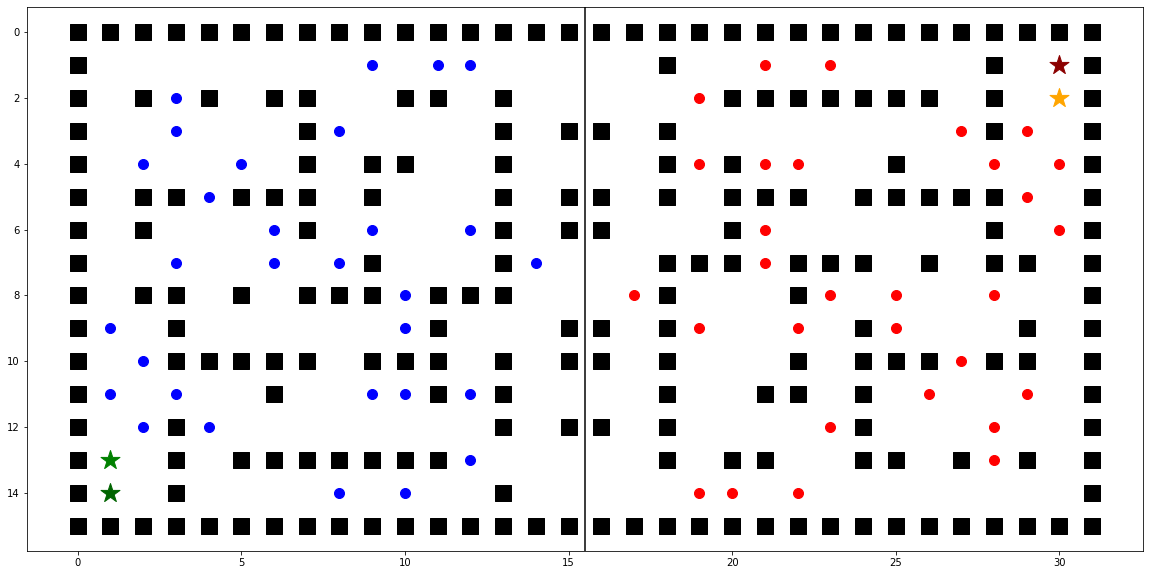

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
ax = draw_game(bot, ax)

## Using 2d Numpy arrays
You can also use numpy matrices. This may be useful for visualization and computation of the next move. The following code might help you get started along this route. 

The first thing we can do is to make a 2d Numpy Array of the same size as our maze and fill fields that have a wall with ones and the rest with zeros.
Be aware that the indexing of numpy matrices, works by indexing as \[row,column] and not by \[x,y] coordinates as the pelita interface does. 

In [10]:
def make_wall_map(bot):
    """
    Computes a numpy array which takes the value 1 at coordinates that have a wall and zero everywhere else
    Input:
    - bot: pelita bot object
    Returns:
    - mat: numpy array
    """
    maze_width, maze_height = get_maze_dimensions(bot.walls)
    wall_map = np.zeros((maze_height, maze_width))
    # get seperate lists of x and y coordinates from a list of tuples
    wall_x, wall_y = zip(*bot.walls)
    # matrices have y, x, or rather row, col indexing!
    wall_map[wall_y, wall_x] = 1
    return wall_map

Matplotlib's `imshow`function lets you visualize 2d arrays as a heat map.

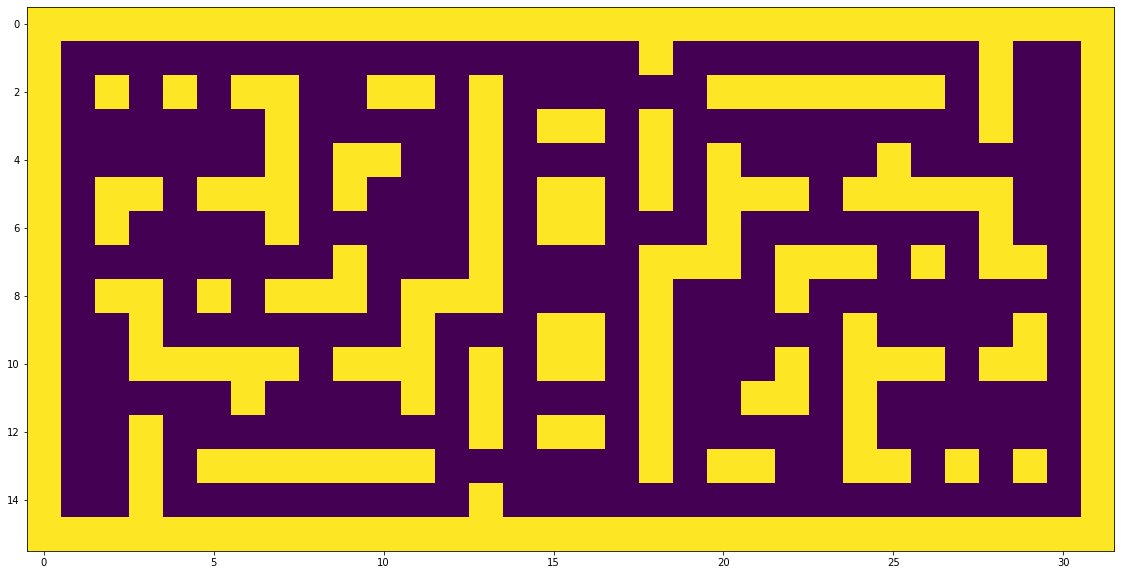

In [11]:
walls = make_wall_map(bot)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(walls)

Now we can put our scatter plot on top.

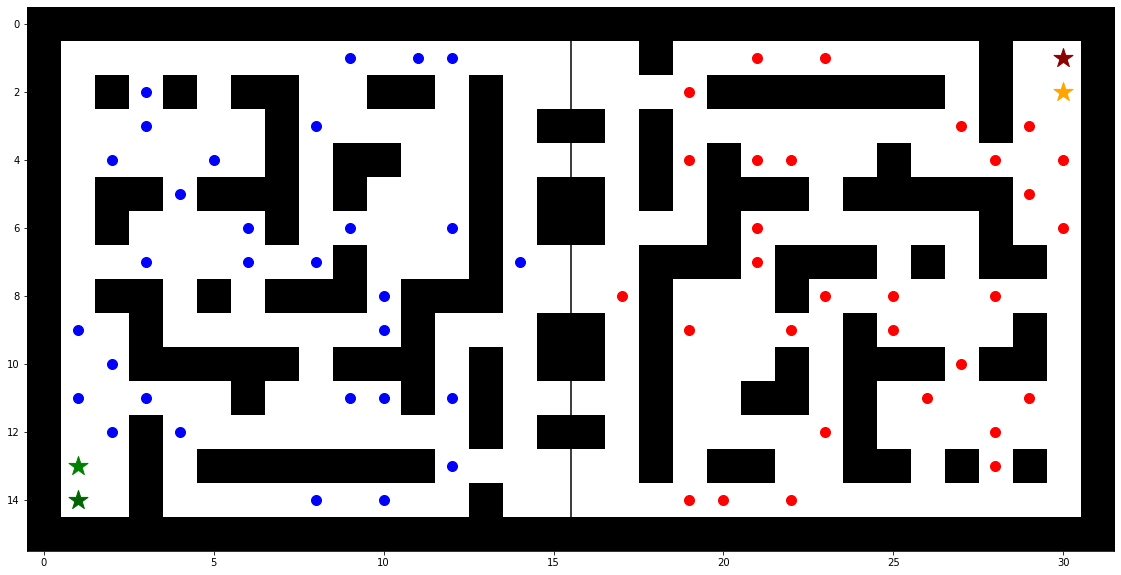

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(walls, cmap="binary")
ax = draw_game(bot, ax)

This might also come in handy when you are looking at possible next moves. For example you could visualize your bot's legal moves like this:

In [14]:
maze_width, maze_height = get_maze_dimensions(bot.walls)
legpos = np.zeros((maze_height, maze_width))

In [15]:
def replace_coords(mat, coords, val):
    """
    Computes a numpy array which takes the value val
    Input:
    - mat: numpy array
    - coords: list of tuples of x,y coordinates
    - val: value to write into the appropriate fields
    Returns:
    - mat: numpy array
    """
    # get seperate lists of x and y coordinates from a list of tuples
    coords_x, coords_y = zip(*coords)
    # matrices have y,x indexing!
    mat[coords_y, coords_x] = val
    return(mat)

In [16]:
legpos = replace_coords(legpos, bot.legal_positions, 1)

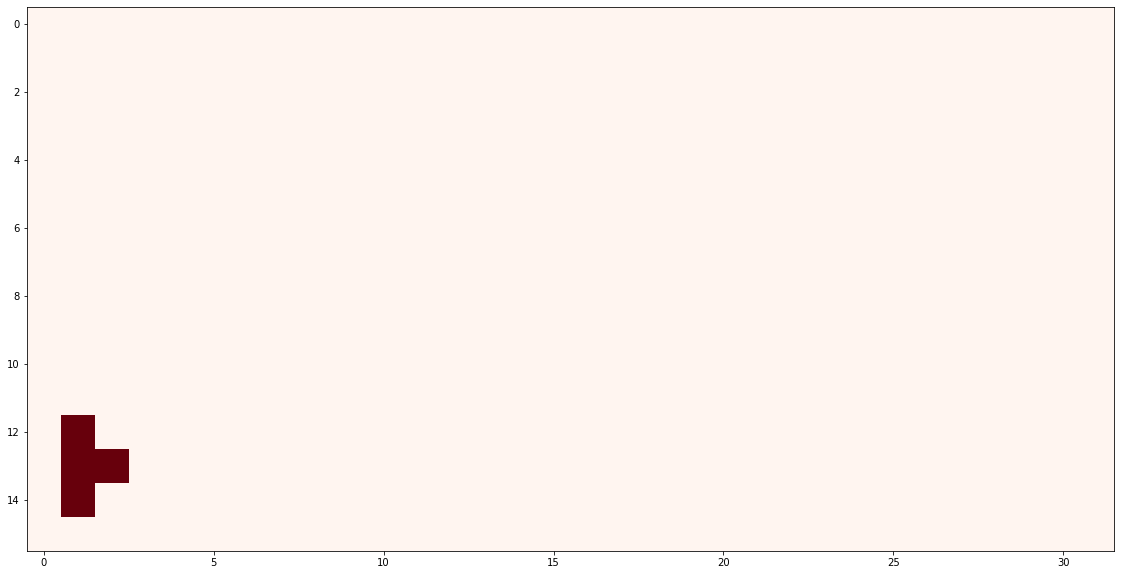

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(legpos, cmap="Reds")

And then add the game elements on top of the matrix:

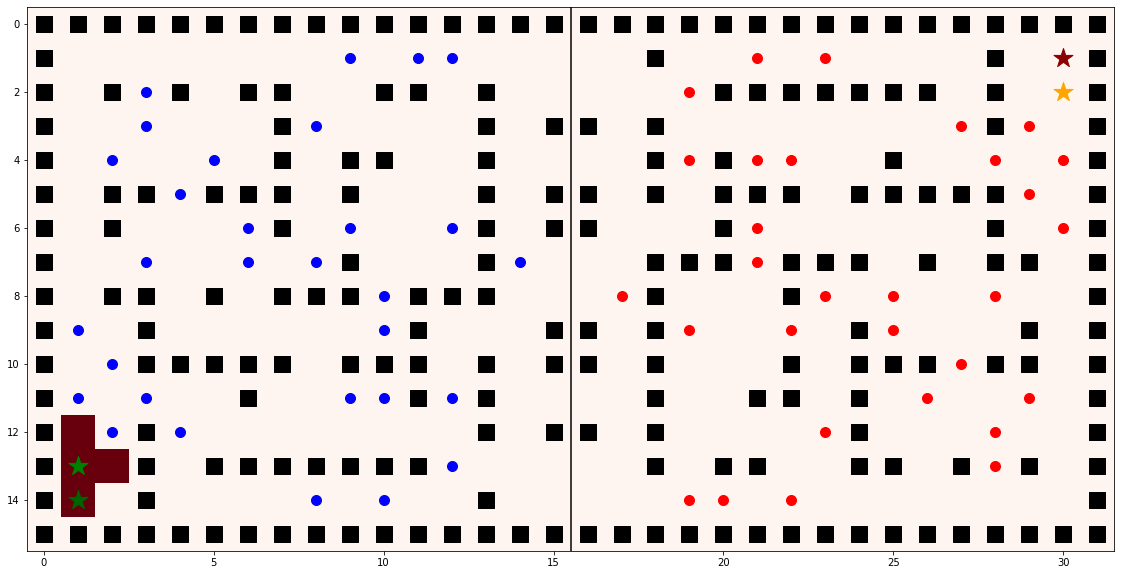

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(legpos, cmap="Reds")
ax = draw_game(bot, ax)

There are many ways to use 2d Numpy arrays to help decide the next move. Expanding on the binary examples shown here you could use them to computing floating point weights or activations for the fields.